In [3]:
#arbol_deciccion

In [4]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.shape

(1599, 12)

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

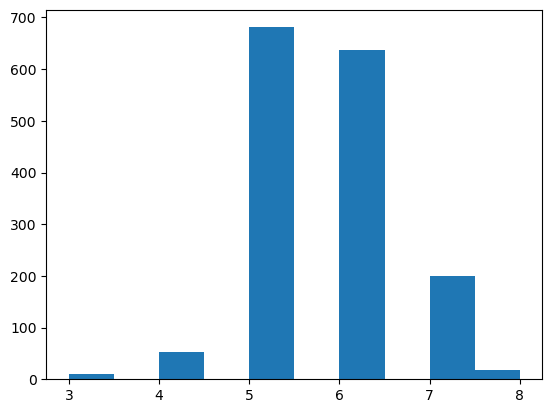

In [12]:
plt.hist(data.quality)

In [13]:
#a simple vista podemos opservar en el histograma q en el dataset hay mas bvalores para quality 8 q para los demas.

<Axes: xlabel='pH', ylabel='alcohol'>

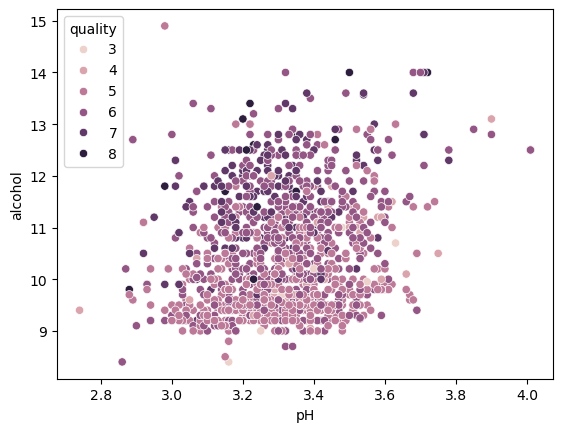

In [14]:
sns.scatterplot(x = "pH", y = "alcohol", hue = "quality", data = data)

In [15]:
#mediante el diagrama de dispercion podemos observar q la mayoria de as qualitys se encuentran en un ph del 3.0 al 3.6 y de el 9 al 13 de alcohol.

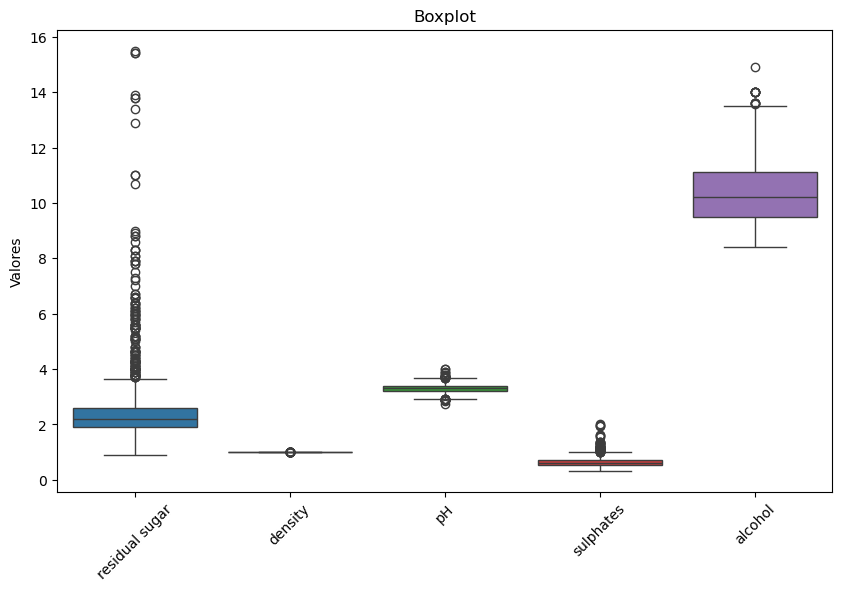

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['residual sugar', 'density', 'pH', 'sulphates','alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot')
plt.ylabel('Valores')
plt.show()

In [17]:
#por medio de este boxplot podemos ver q se encuetran muchos valores atipicos q se encuentran por fuera de los rangos de ccada una de las variables.

In [18]:
predictors_col = ["residual sugar", "density", "pH", "sulphates","alcohol"]
target_col = ['quality']

In [19]:
predictors = data[predictors_col]
target = data[target_col]

In [20]:
predictors

,residual sugar,density,pH,sulphates,alcohol
0,1.9,0.99780,3.51,0.56,9.4
1,2.6,0.99680,3.20,0.68,9.8
2,2.3,0.99700,3.26,0.65,9.8
3,1.9,0.99800,3.16,0.58,9.8
4,1.9,0.99780,3.51,0.56,9.4
...,...,...,...,...,...
1594,2.0,0.99490,3.45,0.58,10.5
1595,2.2,0.99512,3.52,0.76,11.2
1596,2.3,0.99574,3.42,0.75,11.0
1597,2.0,0.99547,3.57,0.71,10.2


In [21]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [22]:
corr = predictors.corr()
corr

,residual sugar,density,pH,sulphates,alcohol
residual sugar,1.000000,0.355283,-0.085652,0.005527,0.042075
density,0.355283,1.000000,-0.341699,0.148506,-0.496180
pH,-0.085652,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.005527,0.148506,-0.196648,1.000000,0.093595
alcohol,0.042075,-0.496180,0.205633,0.093595,1.000000


In [23]:
#con esto podemos ver q en cunto mas rescano a uno hay una correlacion directa, y los valores mas sercanos a menos uno indican una correlacion inversa.

In [24]:
#los valores mas sercanos a cero indican una baja o nula correlacion.

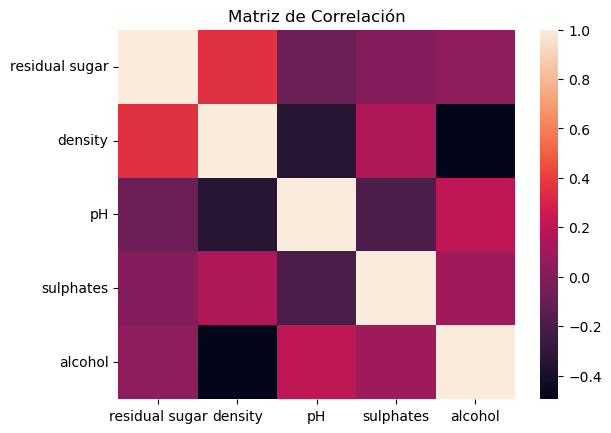

In [25]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [26]:
#en esta grafica se reflejan todos los datos de la tabla anterior pero ahora en forma de matriz de corelacion.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [30]:
#entrenamos el arbol de decicion
tree = DecisionTreeClassifier()

In [32]:
#lo guardamos en esta bariable llamada arbol
arbol = tree.fit(X_train, y_train)

[Text(0.50287378236681, 0.9761904761904762, 'x[4] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.17732914357213767, 0.9285714285714286, 'x[3] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.34010146296947386, 0.9523809523809523, 'True  '),
 Text(0.03441429516876241, 0.8809523809523809, 'x[4] <= 9.533\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.01455989410986102, 0.8333333333333334, 'x[4] <= 9.075\ngini = 0.206\nsamples = 89\nvalue = [0, 5, 79, 5, 0, 0]'),
 Text(0.005294506949040371, 0.7857142857142857, 'x[2] <= 3.19\ngini = 0.611\nsamples = 6\nvalue = [0, 2, 3, 1, 0, 0]'),
 Text(0.0026472534745201853, 0.7380952380952381, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.007941760423560556, 0.7380952380952381, 'x[1] <= 0.998\ngini = 0.625\nsamples = 4\nvalue = [0, 2, 1, 1, 0, 0]'),
 Text(0.005294506949040371, 0.6904761904761905, 'gini = 0.0\nsamples = 2\nvalue

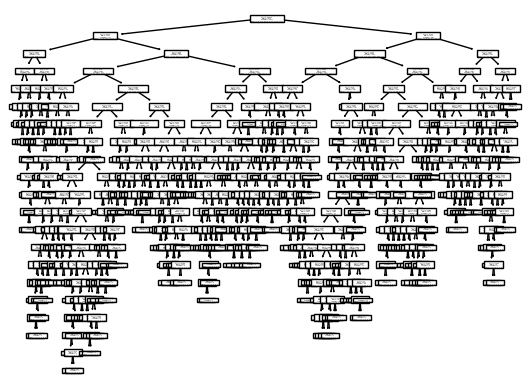

In [33]:
#visualisamos el arbol
plot_tree(arbol)

In [34]:
#como podemos observar se a generado nuestro arbol de deciciones.

In [35]:
#cogemos ahora la parte test q es el 0.2 restante
predicciones = arbol.predict(X_test)

In [36]:
predicciones

array([6, 6, 5, 5, 6, 5, 6, 8, 5, 5, 5, 6, 5, 5, 7, 6, 6, 6, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 4, 5, 7, 6, 6, 5, 6, 5, 3, 5, 6, 5, 7, 6, 5, 6, 6,
       5, 6, 6, 4, 6, 6, 5, 5, 6, 5, 7, 5, 5, 4, 6, 5, 6, 5, 5, 6, 6, 7,
       6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 7, 7, 6, 5, 6, 6, 7, 6,
       7, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 6, 5, 5, 7, 6, 6, 5, 5, 7,
       5, 8, 5, 5, 5, 6, 5, 7, 6, 7, 4, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5,
       4, 7, 6, 5, 7, 5, 6, 7, 6, 5, 6, 6, 8, 4, 6, 5, 6, 6, 5, 6, 5, 5,
       5, 4, 5, 6, 6, 5, 6, 7, 6, 4, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 7,
       5, 5, 6, 6, 7, 6, 5, 5, 4, 7, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6,
       4, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 7, 6, 5,
       6, 5, 6, 7, 5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 6, 5, 5, 6, 5,
       7, 7, 5, 5, 6, 6, 5, 6, 5, 7, 5, 5, 5, 5, 5,

In [37]:
#podeos ver las predicciones con respecto a los valores anteriores o los de train.

In [38]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,3,4,1,0,0
5,0,5,107,29,5,0
6,1,1,30,77,13,2
7,0,3,2,13,17,0
8,0,0,0,3,2,1


In [39]:
#ac en esta matris podemos ver las comparaciones de las predicciones q se acavaron de acer con los datos reales.

In [41]:
#revisamos las metricas
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.640625

In [43]:
#vemos la presision de nestro modelo
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6443537764136087

In [45]:
#vemos la cencibilidad 
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.640625

In [46]:
#como podemos ver los valores anteriores tienen un grado e similitud muy alto lo cual es correcto, nos indica q tenemos un buen nivel de exactitud.

In [47]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6415961969883817

In [50]:
# podemos concluir q el desnpeño de el ,odelo es bueno presenta un 0.640625 de exactitut
#lo q indica q si tubo un buen nivel de exactitud.


In [49]:
#mediante el proseso y la generacion de grafics podemos observar las caracteristicas mas inportantes q deve tener un vino
#para perteneser a cada una de las qualytis del dataset.

## analizando todo el documento a simple vista podemos opservar en el histograma q en el dataset hay mas bvalores para quality 8 q para los demas
# lo q quiere desir q en el documento hay mas vinos de calidad 5 y 6
# en el diagrama de dispercion podemos observar q la mayoria de as qualitys se encuentran en un ph del 3.0 al 3.6 y de el 9 al 13 de alcohol lo cual es escencial para determinar su calidad.
# por medio de el boxplot podemos ver q se encuetran muchos valores atipicos q se encuentran por fuera de los rangos de cada una de las variables.
# en la matris de correlacion podemos obserbar una matris en colores relacionados con la mtris de predicciones anterior mente ejecutada esta matris de correlaciones nos muestra esos valores en colores viendose mas organisada.
# y a continuacio se encuetra el arbol de deciciones q nos muestra todas sus ramas segun los datos.
# luego se puede observar un arreglo de predicciones q nos muestra la qualitys q veiamos al prinsipio en la primer tabla y en el histograma.
# este ejercicio nos muestra q esos items elegidos influyen en gran parte para optener una cuaidad q cada para perteneser a cada una de las cualitys deve cunplir con unos requerimientos espasificos.